In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import models,layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE=32
IMAGE_SIZE=128
EPOCHS=10

In [4]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset='validation',
    seed=123
)
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset='training',
    seed=123
)

test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    
)


Found 28709 files belonging to 7 classes.
Using 5741 files for validation.
Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 7178 files belonging to 7 classes.


In [5]:
val_ds.class_names

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [6]:
class_names=train_ds.class_names

In [7]:
CHANNELS=len(class_names)

In [8]:
len(train_ds)

718

In [9]:
for image,label in train_ds.take(1):
    print(image.numpy(),
         image.shape)

[[[[238.       238.       238.      ]
   [236.4375   236.4375   236.4375  ]
   [227.0625   227.0625   227.0625  ]
   ...
   [ 76.        76.        76.      ]
   [ 82.        82.        82.      ]
   [ 83.        83.        83.      ]]

  [[237.8125   237.8125   237.8125  ]
   [236.27734  236.27734  236.27734 ]
   [227.0664   227.0664   227.0664  ]
   ...
   [ 75.69922   75.69922   75.69922 ]
   [ 81.58203   81.58203   81.58203 ]
   [ 82.5625    82.5625    82.5625  ]]

  [[236.6875   236.6875   236.6875  ]
   [235.3164   235.3164   235.3164  ]
   [227.08984  227.08984  227.08984 ]
   ...
   [ 73.89453   73.89453   73.89453 ]
   [ 79.07422   79.07422   79.07422 ]
   [ 79.9375    79.9375    79.9375  ]]

  ...

  [[219.6875   219.6875   219.6875  ]
   [218.55469  218.55469  218.55469 ]
   [211.75781  211.75781  211.75781 ]
   ...
   [ 68.43359   68.43359   68.43359 ]
   [ 68.22266   68.22266   68.22266 ]
   [ 68.1875    68.1875    68.1875  ]]

  [[220.8125   220.8125   220.8125  ]
   [219

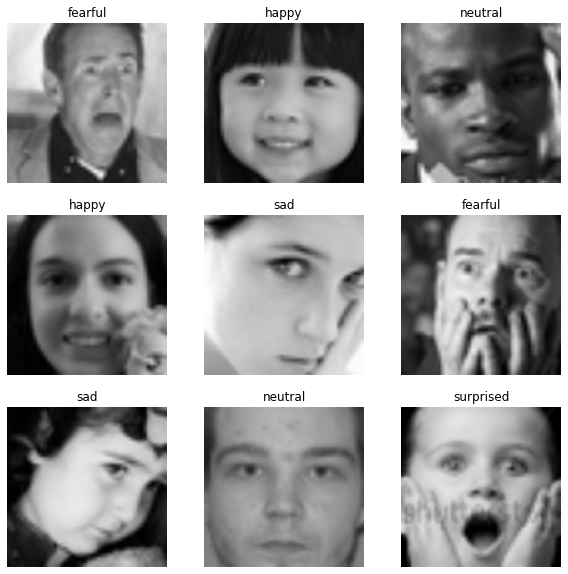

In [10]:
plt.figure(figsize=(10,10))
for image,label in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')
        

In [11]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resizing_rescaling = Sequential(
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
)

In [19]:
num_classes = len(class_names)

model = Sequential([
      layers.Rescaling(1./255, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
      layers.Conv2D(16, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        9280      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)       

In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [22]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
718/718 [==============================] - 298s 410ms/step - loss: 1.7953 - accuracy: 0.2618 - val_loss: 1.7048 - val_accuracy: 0.2917
Epoch 2/10
718/718 [==============================] - 304s 423ms/step - loss: 1.5634 - accuracy: 0.3886 - val_loss: 1.4628 - val_accuracy: 0.4376
Epoch 3/10
718/718 [==============================] - 305s 425ms/step - loss: 1.3920 - accuracy: 0.4602 - val_loss: 1.3391 - val_accuracy: 0.4953
Epoch 4/10
718/718 [==============================] - 296s 413ms/step - loss: 1.2888 - accuracy: 0.5049 - val_loss: 1.2992 - val_accuracy: 0.5110
Epoch 5/10
718/718 [==============================] - 302s 421ms/step - loss: 1.2199 - accuracy: 0.5377 - val_loss: 1.2595 - val_accuracy: 0.5212
Epoch 6/10
718/718 [==============================] - 299s 417ms/step - loss: 1.1648 - accuracy: 0.5573 - val_loss: 1.2301 - val_accuracy: 0.5334
Epoch 7/10
718/718 [==============================] - 299s 417ms/step - loss: 1.1115 - accuracy: 0.5786 - val_loss: 1.2543 -

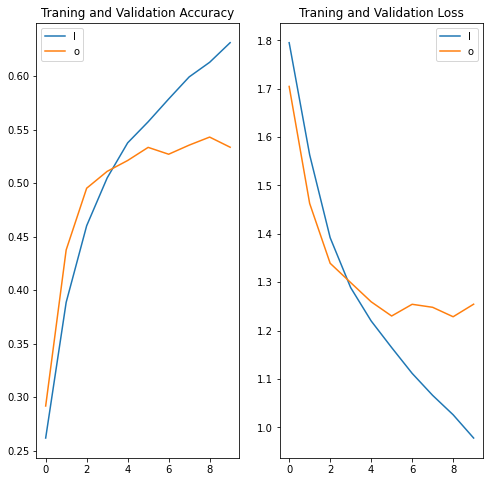

In [23]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Traning Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.title('Traning and Validation Accuracy')
plt.legend('lower right')
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Traning Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.title('Traning and Validation Loss')
plt.legend('lower left')

In [29]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE,
                                  IMAGE_SIZE,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

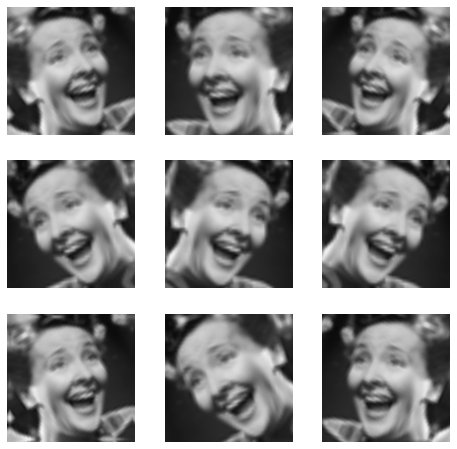

In [36]:
plt.figure(figsize=(8,8))
for image,label in train_ds.take(1):
    for i in range (9):
        plt.subplot(3,3,i+1)
        data_agumention_image=data_augmentation(image)
        plt.imshow(data_agumention_image[0].numpy().astype('uint8'))
        plt.axis('off')

In [47]:
num_classes = len(class_names)

model = Sequential([
      data_augmentation,
      layers.Rescaling(1./255, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
      layers.Conv2D(16, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes, name='outputs')
])

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 64)        9280      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    epochs=15,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
718/718 [==============================] - 263s 362ms/step - loss: 1.7913 - accuracy: 0.2610 - val_loss: 1.7256 - val_accuracy: 0.2866
Epoch 2/15
718/718 [==============================] - 530s 738ms/step - loss: 1.7010 - accuracy: 0.3056 - val_loss: 1.6171 - val_accuracy: 0.3670
Epoch 3/15
718/718 [==============================] - 222s 309ms/step - loss: 1.5921 - accuracy: 0.3726 - val_loss: 1.4720 - val_accuracy: 0.4277
Epoch 4/15
718/718 [==============================] - 239s 333ms/step - loss: 1.5098 - accuracy: 0.4134 - val_loss: 1.3954 - val_accuracy: 0.4620
Epoch 5/15
718/718 [==============================] - 363s 506ms/step - loss: 1.4473 - accuracy: 0.4424 - val_loss: 1.3633 - val_accuracy: 0.4734
Epoch 6/15
718/718 [==============================] - 330s 459ms/step - loss: 1.4010 - accuracy: 0.4558 - val_loss: 1.3130 - val_accuracy: 0.4978
Epoch 7/15
718/718 [==============================] - 279s 389ms/step - loss: 1.3676 - accuracy: 0.4703 - val_loss: 1.2910 -

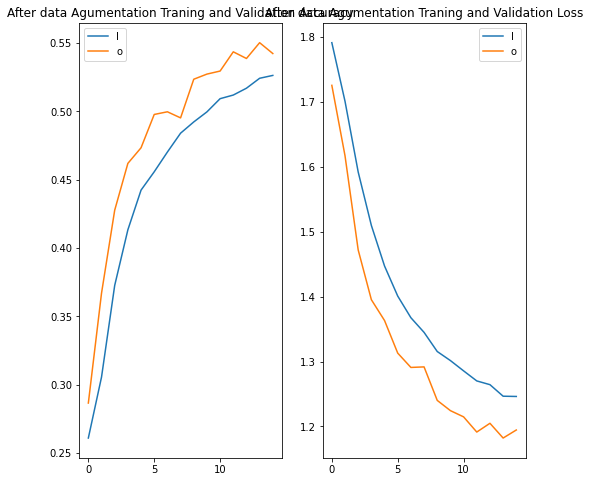

In [52]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(15),acc,label='Traning Accuracy')
plt.plot(range(15),val_acc,label='Validation Accuracy')
plt.title('After data Agumentation Traning and Validation Accuracy')
plt.legend('lower right')
plt.subplot(1,2,2)
plt.plot(range(15),loss,label='Traning Loss')
plt.plot(range(15),val_loss,label='Validation Loss')
plt.title('After data Agumentation Traning and Validation Loss')
plt.legend('lower left')